# LibRecommenders

### Installing libraries

In [1]:
!pip install LibRecommender

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


### Importing packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from libreco.data import random_split, DatasetPure
from libreco.algorithms import LightGCN  # pure data, algorithm LightGCN
from libreco.evaluation import evaluate

### Preparing dataset

In [3]:
products = pd.read_csv('../data/product_details.tsv', sep='\t')
users = pd.read_csv('../data/user_game_time.tsv', sep='\t')

In [4]:
data = users.merge(products, left_on='game_id', right_on='id', how='left')
data = data[['user_id', 'id', 'genre_1_id', 'game_time']].dropna()
data = data.rename(columns={'user_id': 'user', 'id': 'item', 'genre_1_id': 'label', 'game_time': 'time'})

In [46]:
data

,user,item,label,time
112,9,5.0,61.0,443
1077,98,5.0,61.0,61
1606,151,8.0,57.0,572
1746,171,5.0,61.0,324
3518,368,8.0,57.0,0
4803,497,5.0,61.0,156
5608,602,5.0,61.0,0
5952,637,5.0,61.0,65
6567,693,8.0,57.0,243
7202,758,5.0,61.0,959


### Splitting data into train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33)

In [7]:
len(train), len(test)

(8, 4)

In [8]:
train_data, data_info = DatasetPure.build_trainset(train)
test_data = DatasetPure.build_testset(test)

### Building the model

In [9]:
lightgcn = LightGCN(
    task="ranking",
    data_info=data_info,
    loss_type="bpr",
    embed_size=16,
    n_epochs=3,
    lr=1e-3,
    batch_size=2048,
    num_neg=1,
    device="cpu",
)

### Training

In [10]:
lightgcn.fit(
    train_data,
    neg_sampling=True,
    verbose=2,
    metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
)


Training start time: 2024-03-16 21:30:21


train: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.94it/s]


Epoch 1 elapsed: 0.268s
	 train_loss: 0.6727


train: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.04it/s]


Epoch 2 elapsed: 0.030s
	 train_loss: 0.6717


train: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 104.96it/s]

Epoch 3 elapsed: 0.022s
	 train_loss: 0.6707


### Evaluating

In [11]:
evaluate(
    model=lightgcn,
    data=test_data,
    neg_sampling=True,
    metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
)

eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 246.45it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.90it/s]


{'loss': 0.6922103128444741,
 'roc_auc': 0.75,
 'precision': 0.2,
 'recall': 1.0,
 'ndcg': 1.0}

## Running experiments

Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1965.47it/s]


Training start time: 2024-03-17 12:18:55



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1873.29it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.64it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:56




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:56



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:57




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:57




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.88it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:57




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.77it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.92it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]

eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.79it/s]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:57



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.01it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:58




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.01it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1836.39it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:58



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.06it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.66it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:59




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]

eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.01it/s]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:18:59




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:18:59



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:00




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:00




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:00




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:00




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1891.03it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:00



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.94it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:01




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:01




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:01



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.61it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:02




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.60it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:02




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 331.88it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.97it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.83it/s]


Training start time: 2024-03-17 12:19:02



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1657.83it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1890.18it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]

eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 624.52it/s]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:03


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 220.15it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:03



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1968.23it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 198.68it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.05it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:04



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 928.77it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 198.35it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.50it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 132.09it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:05



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.62it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:06




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.95it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.01it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:06



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 626.58it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1787.09it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:07




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.99it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:07



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:08




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.07it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:08



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.00it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.01it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:09




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:09




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:09




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:09




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:09



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 397.26it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:10




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:10




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:10




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:10




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 117.34it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:10




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:10



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:11




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:11




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:11



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.99it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:12




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:12




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:12



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:13




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:13




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:13




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1875.81it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 858.26it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1670.37it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 99.87it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:13




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:13



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.53it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 329.04it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:14




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:14



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:14




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:15




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]

eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.04it/s]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:15



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 284.61it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.99it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:16




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:16




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:16



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 110.97it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:17




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:17




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.92it/s]


Training start time: 2024-03-17 12:19:17



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:18




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:18



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:19




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.09it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:19



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:20




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.06it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 992.97it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:20



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:21




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.07it/s]

Training start time: 2024-03-17 12:19:21




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:21



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:22




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.99it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.76it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:22




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:22




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:22




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:22




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:22



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:23




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1891.03it/s]

Training start time: 2024-03-17 12:19:23




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:23



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 332.04it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 97.79it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 99.85it/s]

Training start time: 2024-03-17 12:19:24




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:24




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:24



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.93it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.41it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:25



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:25




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 133.13it/s]

Training start time: 2024-03-17 12:19:26




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:26




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.98it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:26




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:26




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:26



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:27




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:27




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.93it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1859.18it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:27



eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1840.41it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.86it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:28




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:28



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:29



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1883.39it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:30




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:30




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:30




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.02it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:30




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:30



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.00it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:31




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:31




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:31




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:31




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:31




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:31



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 219.99it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 989.69it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 97.81it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:32




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:32



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 153.08it/s]

Training start time: 2024-03-17 12:19:33




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:33




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:33




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.95it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:33




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:33




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:33



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:34




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1917.83it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:34




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:34



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 180.05it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:35




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:35



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:36




eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1878.33it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:36




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:36



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 988.76it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:37




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:37



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.28it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:38




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:38



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:38




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:39




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.86it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.03it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:39



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]


eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:40




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:40



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:41




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:41




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:41




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:41




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:41



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.93it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:42




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:42




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:42




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 398.40it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:42



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:42




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:43




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.02it/s]

Training start time: 2024-03-17 12:19:43




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Training start time: 2024-03-17 12:19:43




eval_pointwise: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]



eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Training start time: 2024-03-17 12:19:43



eval_pointwise: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.00it/s]

Detect 8 unknown interaction(s), position: [0, 1, 2, 3, 4, 5, 6, 7]




eval_listwise: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Best configuration:
	loss: 0.6829454587044362
	epochs: 10.0
	lr: 0.1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

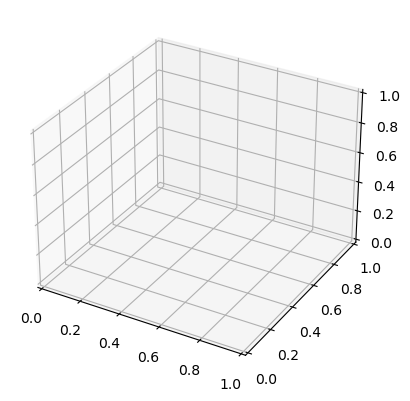

In [25]:

lrs = np.linspace(0.001, 0.1, 100)
num_epochs = np.linspace(1, 10, 10)


losses = np.zeros((len(num_epochs), len(lrs)))
for i, epochs in enumerate(num_epochs):
    for j, lr in enumerate(lrs):
        lightgcn = LightGCN(
            task="ranking",
            data_info=data_info,
            loss_type="bpr",
            embed_size=16,
            n_epochs=int(epochs),
            lr=lr,
            batch_size=2048,
            num_neg=1,
            device="cpu",
        )


        lightgcn.fit(
            train_data,
            neg_sampling=True,
            verbose=0,
            metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
        )

        evaluation = evaluate(
            model=lightgcn,
            data=test_data,
            neg_sampling=True,
            metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
        )
        losses[i, j] = evaluation['loss']
        
row, col = np.unravel_index(losses.argmin(), losses.shape)
print(f'Best configuration:\n\tloss: {losses[row, col]}\n\tepochs: {num_epochs[row]}\n\tlr: {lrs[col]}')

### Presenting Results of Experiments

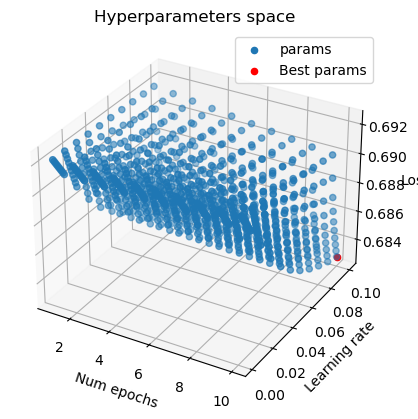

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

vepochs, vlr = np.meshgrid(num_epochs, lrs)

ax.scatter(vepochs, vlr, losses, label='params') 
ax.scatter(num_epochs[row], lrs[col], losses[row, col], c='r', label='Best params') 
ax.set_title('Hyperparameters space')
ax.set_xlabel('Num epochs')
ax.set_ylabel('Learning rate')
ax.set_zlabel('Loss')
ax.legend()

In [ ]:
lightgcn.recommend_user(user=1077, n_rec=7)

### Applying best hyperparameters

In [41]:
best_epochs, best_lr = num_epochs[row], lrs[col]

In [42]:
from typing import List, Tuple

lightgcn = LightGCN(
            task="ranking",
            data_info=data_info,
            loss_type="bpr",
            embed_size=16,
            n_epochs=int(best_epochs),
            lr=best_lr,
            batch_size=2048,
            num_neg=1,
            device="cpu",
        )


lightgcn.fit(
    train_data,
    neg_sampling=True,
    verbose=0,
    metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
)


def get_recommendations(user_id) -> List[Tuple[int, float]]:
    indices = lightgcn.recommend_user(user=user_id, n_rec=10, filter_consumed=True)
    return [(int(indices[user_id][i]), float(lightgcn.predict(user_id, indices[user_id][i])[0])) for i in range(len(indices[user_id]))]

Training start time: 2024-03-17 12:35:20


In [43]:
get_recommendations(9)

Detect unknown user: 9
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]
Detect 1 unknown interaction(s), position: [0]


[(8, 0.49379947781562805),
 (5, 0.5147081017494202),
 (8, 0.49379947781562805),
 (5, 0.5147081017494202),
 (8, 0.49379947781562805),
 (8, 0.49379947781562805),
 (8, 0.49379947781562805),
 (8, 0.49379947781562805),
 (5, 0.5147081017494202),
 (5, 0.5147081017494202)]